In [ ]:
# %pip install numpy matplotlib 

In [ ]:
# %pip install graphviz

In [3]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5
f(3.0)

20.0

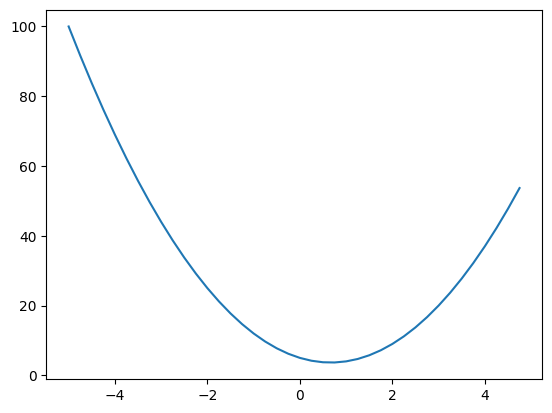

In [5]:
xs = np.arange(-5,5,.25)
ys = f(xs)
plt.plot(xs,ys);

In [6]:
#Getting complex
a=1
b=2
c=3
d=a*b+c
print(d)

5


In [7]:
# Taking the derivative, using infinitesimal limits on addition
h = 0.0001

a=1
b=-2
c=3

d1=a*b+c
c+=h
d2=a*b+c

print('d1 =', d1)
print('d2 =', d2)
print('slope =',(d2-d1)/h)

d1 = 1
d2 = 1.0001000000000002
slope = 1.0000000000021103


## Value Object

In [8]:
class Value:
    def __init__(self, data, _children = (), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self,other):
        out = Value(self.data+ other.data, (self,other), '+')
        return out
    def __mul__(self,other):
        out = Value(self.data* other.data, (self,other), '*')
        return out

In [37]:
a = Value(2.0, label  ='a')
b = Value(-3.0,label  ='b')
c= Value(10.0, label  ='c')
e = a*b; e.label = 'e'
d= e + c ; d.label = 'd'
d._prev
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data = -8.0)

In [10]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

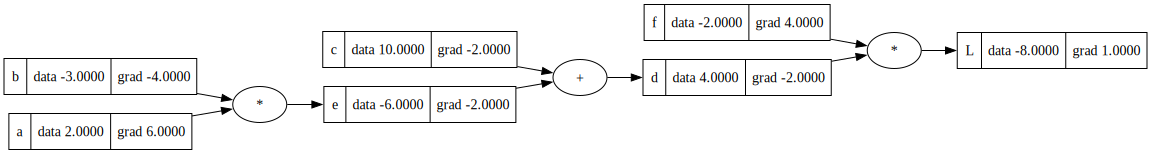

In [42]:
draw_dot(L)

In [41]:
L.grad = 1
d.grad = -2
f.grad = 4

c.grad = -2.0
e.grad = -2.0

a.grad = -3.0*-2.0
b.grad = 2.0 *-2.0

In [51]:
a.data+= .001* a.grad
c.data+= .001* c.grad
f.data+= .001* f.grad
b.data+= .001* b.grad

e = a*b
d = c+b
L = d*f

print(L.data)
 

-13.28777599999999


In [39]:
def lol():
    
    h= 0.001

    a = Value(2.0, label  ='a')
    b = Value(-3.0,label  ='b')
    c= Value(10.0, label  ='c')
    e = a*b; e.label = 'e'
    d= e +c ; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1= L.data

    a = Value(2.0, label  ='a')
    b = Value(-3.0,label  ='b')
    b.data+=h 
    c= Value(10.0, label  ='c')
    e = a*b; e.label = 'e'
    d= e +c ; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2= L.data


    print((L2-L1)/h)

lol()

-3.9999999999995595


TypeError: float() argument must be a string or a real number, not 'numpy.ufunc'

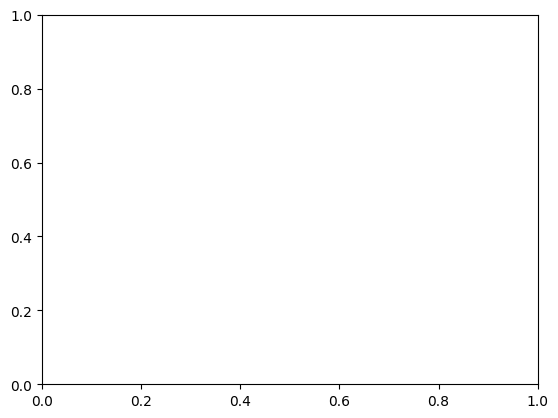

In [52]:
plt.plot(np.tanh(np.arange(-5,5,0.2)))